# Training the Dataset  🏃🏻

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingRegressor

In [2]:
train = pd.read_csv('./output/diamond_train_numeric.csv', index_col=0)
train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.30,3,1,1,62.8,56.0,4.29,4.31,2.70,605
1,0.34,4,2,2,62.6,55.0,4.46,4.49,2.80,565
2,0.40,3,3,2,60.3,62.0,4.70,4.75,2.85,720
3,0.40,5,4,3,61.8,59.2,4.72,4.74,2.92,793
4,0.90,3,3,2,61.0,63.0,6.10,6.13,3.73,4381


In [3]:
train.shape

(40455, 10)

In [4]:
test = pd.read_csv('./output/diamond_test_numeric.csv', index_col=0)
test.head()

,carat,cut,color,clarity,depth,table,x,y,z
id,,,,,,,,,
0,2.36,4,7,4,60.8,54.0,8.68,8.57,5.24
1,2.04,4,4,4,62.0,56.0,8.18,8.23,5.09
2,0.51,4,7,2,61.7,54.0,5.18,5.19,3.20
3,0.30,4,7,2,61.3,56.0,4.32,4.33,2.65
4,0.96,1,4,1,68.8,56.0,6.11,5.98,4.16


In [5]:
test.shape

(13485, 9)

--------

---------

## Checking out the RMSE of each model

In [6]:
X = train.drop(columns=["price"])
y = train["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [43]:
models = {
    "forest200": RandomForestRegressor(n_estimators=200),
    "forest400": RandomForestRegressor(n_estimators=400),
    "ada700": AdaBoostRegressor(n_estimators=700),
    "ada900": AdaBoostRegressor(n_estimators=900),
    "boosting_950": GradientBoostingRegressor(n_estimators=950),
    "boosting_1050": GradientBoostingRegressor(n_estimators=1050),
    "extra_100":ExtraTreesRegressor(),
    "extra_300":ExtraTreesRegressor(n_estimators=300),
    "extra_700":ExtraTreesRegressor(n_estimators=700)
}

In [44]:
for name, model  in models.items():
    print(f"Starting training")
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    print(f"Training complete")

Starting training
Training forest200...
Training complete
Starting training
Training forest400...
Training complete
Starting training
Training ada700...
Training complete
Starting training
Training ada900...
Training complete
Starting training
Training boosting_950...
Training complete
Starting training
Training boosting_1050...
Training complete
Starting training
Training extra_100...
Training complete
Starting training
Training extra_300...
Training complete
Starting training
Training extra_700...
Training complete


In [45]:
printMetric = lambda label,value:print(f"\t {label}: {round(value,4)}")

for name,m in models.items():
    y_pred = m.predict(X_test)
    print(f"Evaluating model {name}")
    printMetric("RMSE",math.sqrt(mean_squared_error(y_test, y_pred)))

Evaluating model forest200
	 RMSE: 565.6492
Evaluating model forest400
	 RMSE: 562.9983
Evaluating model ada700
	 RMSE: 1280.7117
Evaluating model ada900
	 RMSE: 1339.0157
Evaluating model boosting_950
	 RMSE: 580.8635
Evaluating model boosting_1050
	 RMSE: 576.8549
Evaluating model extra_100
	 RMSE: 545.5333
Evaluating model extra_300
	 RMSE: 540.0494
Evaluating model extra_700
	 RMSE: 540.8698


XXXXXXXXXXXXXXXXXXXXXXXXX

In [8]:
models = {
    "forest400": RandomForestRegressor(n_estimators=400),
    "boosting_950": GradientBoostingRegressor(n_estimators=950, loss="huber"),
    "extra_100": ExtraTreesRegressor(),
    "extra_300": ExtraTreesRegressor(n_estimators=300),
    "hist": HistGradientBoostingRegressor() 
}

In [9]:
for name, model  in models.items():
    print(f"Starting training")
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    print(f"Training complete")

Starting training
Training forest400...
Training complete
Starting training
Training boosting_950...
Training complete
Starting training
Training extra_100...
Training complete
Starting training
Training extra_300...
Training complete
Starting training
Training hist...
Training complete


In [10]:
printMetric = lambda label,value:print(f"\t {label}: {round(value,4)}")

for name,m in models.items():
    y_pred = m.predict(X_test)
    print(f"Evaluating model {name}")
    printMetric("RMSE",math.sqrt(mean_squared_error(y_test, y_pred)))

Evaluating model forest400
	 RMSE: 600.7578
Evaluating model boosting_950
	 RMSE: 628.2848
Evaluating model extra_100
	 RMSE: 580.8564
Evaluating model extra_300
	 RMSE: 580.4067
Evaluating model hist
	 RMSE: 582.0983


-------

-------

## Checking out the RMSE of each model ALLLLLLLLLLLLINNNNNNNNNNNN

In [33]:
X = train.drop(columns=["price"])
y = train["price"]

In [36]:
models = {
    "forest200": RandomForestRegressor(n_estimators=200),
    "forest400": RandomForestRegressor(n_estimators=400),
    "ada700": AdaBoostRegressor(n_estimators=700),
    "ada900": AdaBoostRegressor(n_estimators=900),
    "boosting_950": GradientBoostingRegressor(n_estimators=950),
    "boosting_1050": GradientBoostingRegressor(n_estimators=1050),
    "extra_100": ExtraTreesRegressor(),
    "extra_300": ExtraTreesRegressor(n_estimators=300)
}

In [37]:
for name, model  in models.items():
    print(f"Starting training")
    print(f"Training {name}...")
    model.fit(X, y)
    print(f"Training complete")

Starting training
Training forest200...
Training complete
Starting training
Training forest400...
Training complete
Starting training
Training ada700...
Training complete
Starting training
Training ada900...
Training complete
Starting training
Training boosting_950...
Training complete
Starting training
Training boosting_1050...
Training complete
Starting training
Training extra_100...
Training complete
Starting training
Training extra_300...
Training complete


In [38]:
printMetric = lambda label,value:print(f"\t {label}: {round(value,4)}")

for name,m in models.items():
    y_pred = m.predict(X)
    print(f"Evaluating model {name}")
    printMetric("RMSE",math.sqrt(mean_squared_error(y, y_pred)))

Evaluating model forest200
	 RMSE: 207.5066
Evaluating model forest400
	 RMSE: 206.2355
Evaluating model ada700
	 RMSE: 1342.4689
Evaluating model ada900
	 RMSE: 1506.3448
Evaluating model boosting_950
	 RMSE: 505.7425
Evaluating model boosting_1050
	 RMSE: 498.334
Evaluating model extra_100
	 RMSE: 8.7759
Evaluating model extra_300
	 RMSE: 8.7759


-------

---------

## Hyperparameter optimization with GridSearchCV

#### RandomForest Hiperparameters

In [55]:
parameters = {'max_features': ['auto', 'sqrt', 'log2']}

In [56]:
hyperGrid = GridSearchCV(estimator=ExtraTreesRegressor(), param_grid=parameters, verbose=1)
hyperFit = hyperGrid.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   57.2s finished


In [57]:
print(hyperFit.best_params_)

{'max_features': 'auto'}


In [12]:
parameters = {'bootstrap': [True, False]}

In [13]:
hyperGrid = GridSearchCV(estimator=ExtraTreesRegressor(), param_grid=parameters, verbose=1)
hyperFit = hyperGrid.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   53.7s finished


In [14]:
print(hyperFit.best_params_)

{'bootstrap': False}


-------

-----

### Pred N1 w/ GradientBoostingRegressor950

In [32]:
X = train.drop(columns=["price"])
y = train["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [33]:
model = GradientBoostingRegressor(n_estimators=950)
fitted_model = model.fit(X, y)

In [15]:
y_pred = fitted_model.predict(X_test)

In [16]:
pred = pd.DataFrame(y_pred).reset_index()
pred = pred.rename(columns={"index": "id", 0: "price"})
pred.head()

,id,price
0,0,6541.127269
1,1,4454.568225
2,2,792.163608
3,3,475.962968
4,4,5231.745767


In [17]:
pred.shape

(8091, 2)

In [19]:
y_pred_final = fitted_model.predict(test)
y_pred_final

array([14950.78916486, 15958.48030685,  1182.00126183, ...,
        2351.993423  ,  1073.8631075 ,  2539.38868582])

In [22]:
pred = pd.DataFrame(y_pred_final).reset_index()
pred = pred.rename(columns={"index": "id", 0: "price"})
pred.head()

,id,price
0,0,14950.789165
1,1,15958.480307
2,2,1182.001262
3,3,426.088792
4,4,3480.987319


In [31]:
pred.shape

(13485, 2)

In [23]:
# pred.to_csv('./output/pred1.csv', header=True, index=False)

In [34]:
x_predict = fitted_model.predict(X_test)

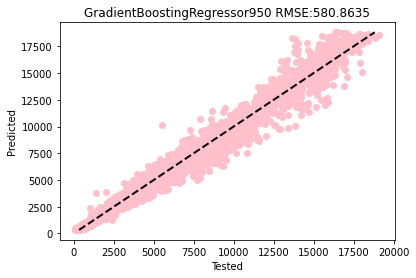

In [36]:
plt.scatter(x_predict,y_test, c="pink")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,)
plt.xlabel('Tested')
plt.ylabel('Predicted')
plt.title("GradientBoostingRegressor950 RMSE:580.8635" )
plt.show()

--------

------

### Pred N2 w/ RandomForestRegressor400 no train_test_split split

In [6]:
X = train.drop(columns=["price"])
y = train["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
model = RandomForestRegressor(n_estimators=400)
fitted_model = model.fit(X, y)

In [10]:
y_pred_final = fitted_model.predict(test)
y_pred_final

array([14734.04  , 15776.1025,   997.6525, ...,  2478.8225,  1022.7975,
        2632.37  ])

In [19]:
pred = pd.DataFrame(y_pred_final).reset_index()
pred = pred.rename(columns={"index": "id", 0: "price"})
pred.head()

,id,price
0,0,14373.1575
1,1,15874.8525
2,2,998.1775
3,3,458.6750
4,4,3516.5150


In [20]:
pred.shape

(13485, 2)

In [21]:
# pred.to_csv('./output/pred2.csv', header=True, index=False)

In [14]:
x_predict = fitted_model.predict(X_test)

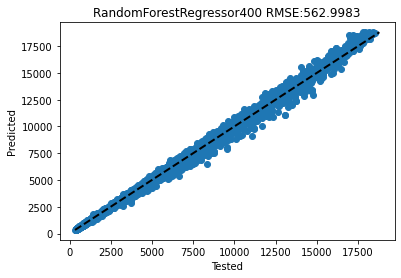

In [31]:
plt.scatter(x_predict,y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,)
plt.xlabel('Tested')
plt.ylabel('Predicted')
plt.title("RandomForestRegressor400 RMSE:562.9983" )
plt.show()

-------

------

### Pred N3 w/ ExtraTreesRegressor400 no train_test_split split

In [6]:
X = train.drop(columns=["price"])
y = train["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
model = ExtraTreesRegressor(n_estimators=400)
fitted_model = model.fit(X, y)

In [28]:
y_pred_final = fitted_model.predict(test)
y_pred_final

array([14684.355 , 15258.75  ,   980.335 , ...,  2472.585 ,  1007.88  ,
        2797.7375])

In [29]:
pred = pd.DataFrame(y_pred_final).reset_index()
pred = pred.rename(columns={"index": "id", 0: "price"})
pred.head()

,id,price
0,0,14684.3550
1,1,15258.7500
2,2,980.3350
3,3,456.6125
4,4,3803.2875


In [30]:
pred.shape

(13485, 2)

In [31]:
# pred.to_csv('./output/pred3.csv', header=True, index=False)

In [8]:
x_predict = fitted_model.predict(X_test)

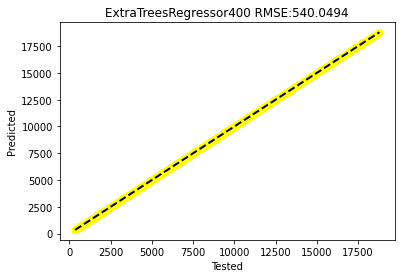

In [11]:
plt.scatter(x_predict, y_test, c="yellow")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,)
plt.xlabel('Tested')
plt.ylabel('Predicted')
plt.title("ExtraTreesRegressor400 RMSE:540.0494" )
plt.show()

------

------

### Pred N4 w/ ExtraTreesRegressor400 no train_test_split split

In [12]:
X = train.drop(columns=["price"])
y = train["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
model = HistGradientBoostingRegressor() 
fitted_model = model.fit(X, y)

In [17]:
y_pred_final = fitted_model.predict(test)
y_pred_final

array([15746.27794748, 15647.75404285,  1259.17624546, ...,
        2599.54636434,  1089.14076319,  2530.44332598])

In [18]:
pred = pd.DataFrame(y_pred_final).reset_index()
pred = pred.rename(columns={"index": "id", 0: "price"})
pred.head()

,id,price
0,0,15746.277947
1,1,15647.754043
2,2,1259.176245
3,3,488.798844
4,4,3268.718621


In [19]:
pred.shape

(13485, 2)

In [20]:
pred.to_csv('./output/pred4.csv', header=True, index=False)